In [1]:
# RNN

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import Tanh, Softmax, Linear, Relu, Sigmoid
from gympy.networks import RNN, DataSet
from gympy.optimizers import SGD, Adam
from gympy.loss import CategoricalCrossEntropy, MeanSquaredError

In [54]:
sin_wave = np.array([math.sin(0.1*x) for x in np.arange(200)])

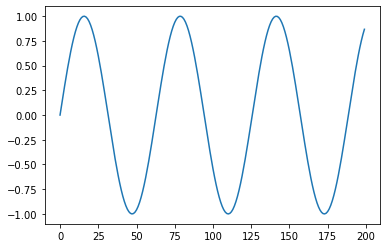

In [55]:
plt.plot(sin_wave)

In [56]:
data = DataSet()
data.from_timeseries(sin_wave.reshape(1,-1),len_seq=10)
print(data.x.shape)
print(data.y.shape)
print(data.batch_size)

(190, 1, 10)
(190, 1, 1)
190


In [65]:
rnn = RNN(
    n_input=1, 
    n_hidden=10,
    n_output=1, 
    layer_hidden=Tanh,
    layer_output=Linear, 
    loss=MeanSquaredError(), 
    optimizer=SGD(learning_rate=0.001)
)

rnn.type


<RnnEnum.many_one: 'many_one'>

In [67]:
rnn.get_grads_dw()

[None, None, None]

In [68]:
y,a =rnn.forward(data.x[0,:,:])
print(y.shape, a.shape)

(1, 10) (10, 10)


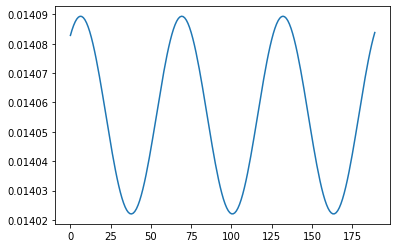

In [69]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)

In [61]:
data.x[0,:,:]

array([[0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
        0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691]])

In [62]:
rnn.get_loss(data.x[0,:,:],data.y[0,:,:])

[[0.0019767]] [[0.84147098]]


0.7047506464510994

In [63]:
rnn.train_dataset(data,show=1, n_epochs=1)

0 cost 0.7047506464510994 iter 0
0 cost 0.15591484076108067 iter 50
0 cost 738.8141279023351 iter 100
0 cost 285.46955159823176 iter 150


/opt/anaconda3/envs/gympy/lib/python3.8/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/opt/anaconda3/envs/gympy/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/scuervo91/Documents/dev/gympy/gympy/layers/functions.py:15: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


0 cost nan iter 190


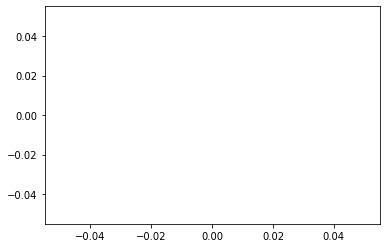

In [64]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)